(0.0, 1.0)

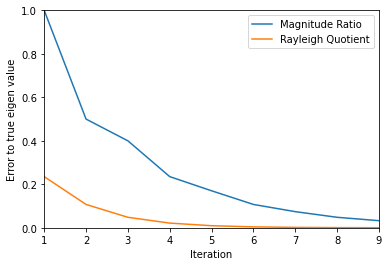

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def power_method_with_scaling(A, x_n, iterations):
    # Compute dominant eigen vector of A using power method.
    
    # A: Matrix
    # x_n: Initial guess for eigen vector
    # iterations: Number of iterations
    
    # track intermediate values for later plotting
    magnitude_ratios = []
    rayleigh_quotients = []
    
    for i in range(iterations):
        # obtain greatest entry in vector
        max_x_n = np.max(x_n)
        # calculate product of matrix and vector
        x_n_prime = np.dot(A, x_n)
        # calculate the norm of the vector
        x_n_prime_norm = np.linalg.norm(x_n_prime)
        # normalize the vector by dividing by the norm
        x_n = x_n_prime / x_n_prime_norm
        magnitude_ratios.append(np.max(x_n_prime) / max_x_n)
        rayleigh_quotients.append(np.dot(x_n, np.dot(A, x_n)) / np.dot(x_n,x_n))        
    return x_n, [magnitude_ratios, rayleigh_quotients]

# example from A1 lecture notes
A = np.array([[-1, 2], [2, 2]])
x_n = np.array([1,1])
iterations = 10

dominant_eigen_vector, estimates = power_method_with_scaling(A, x_n, iterations)
# compute true solution
values, vectors = np.linalg.eig(A)
idx = np.argmax(np.abs(values))
x = range(1, iterations+1)
# magnitude ratios errors
y = np.abs(estimates[0] - values[idx])
# rayleight quotient errors
z = np.abs(estimates[1] - values[idx])
plt.plot(x, y, label='Magnitude Ratio')
plt.plot(x, z, label='Rayleigh Quotient')
plt.legend(loc="upper right")
plt.ylabel('Error to true eigen value')
plt.xlabel('Iteration')
plt.xlim(1, iterations-1)
plt.ylim(0,1)